In [119]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns

In [120]:
iris = pd.read_csv("./dataset/iris.csv")
iris.head()

,sepallen,sepalwid,petallen,petalwid,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [121]:
X = iris[['sepallen','sepalwid']]
X

,sepallen,sepalwid
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [122]:
y = iris.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label, Length: 150, dtype: int64

In [123]:
X.iloc[:,0]

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepallen, Length: 150, dtype: float64

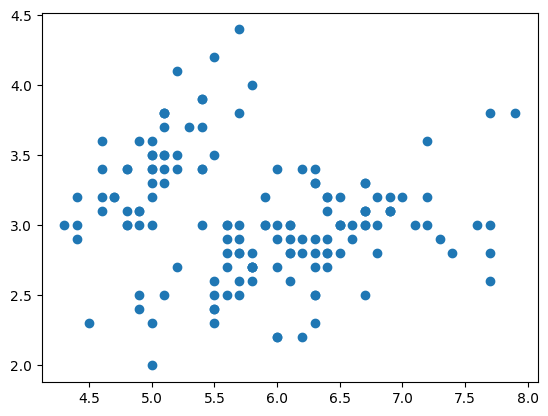

In [124]:
plt.scatter(X.iloc[:,0], X.iloc[:,1])
plt.show()

In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
y_gmm = gmm.predict(X_scaled)

In [127]:
print("Confusion Matrix:\n", confusion_matrix(y, y_gmm))

Confusion Matrix:
 [[ 0  1 49]
 [13 37  0]
 [31 19  0]]


In [128]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3)
km.fit(X_scaled)
y_km=km.predict(X_scaled)

c:\Users\JOJO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
print("Confusion Matrix:\n", confusion_matrix(y, y_km))

Confusion Matrix:
 [[ 0 49  1]
 [15  0 35]
 [34  0 16]]


In [130]:
accuracy_score(y,y_gmm)

0.24666666666666667

In [131]:
X['labels'] = y_gmm

C:\Users\JOJO\AppData\Local\Temp\ipykernel_23344\3815727541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['labels'] = y_gmm


In [132]:
X0 = X[X['labels']== 0]
X1 = X[X['labels']== 1]
X2 = X[X['labels']== 2]

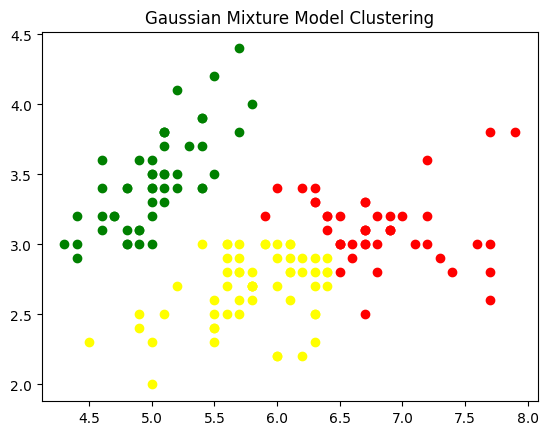

In [133]:
plt.title("Gaussian Mixture Model Clustering")
plt.scatter(X0.iloc[:,0], X0.iloc[:,1], c ='r')
plt.scatter(X1.iloc[:,0], X1.iloc[:,1], c ='yellow')
plt.scatter(X2.iloc[:,0], X2.iloc[:,1], c ='g')
plt.show()

C:\Users\JOJO\AppData\Local\Temp\ipykernel_23344\3014061378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmlabels'] = y_km


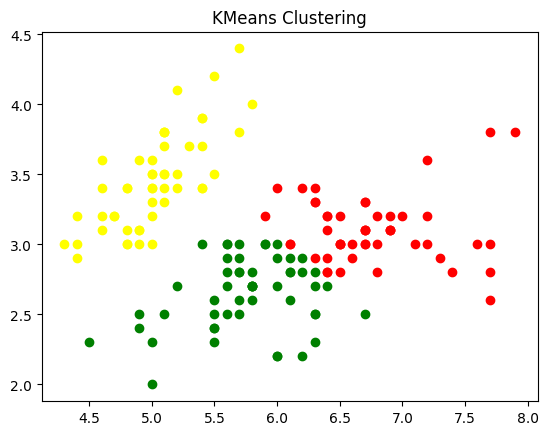

In [134]:
X['kmlabels'] = y_km
X0km = X[X['kmlabels']== 0]
X1km = X[X['kmlabels']== 1]
X2km = X[X['kmlabels']== 2]
plt.title("KMeans Clustering")
plt.scatter(X0km.iloc[:,0], X0km.iloc[:,1], c ='r')
plt.scatter(X1km.iloc[:,0], X1km.iloc[:,1], c ='yellow')
plt.scatter(X2km.iloc[:,0], X2km.iloc[:,1], c ='g')
plt.show()